<a href="https://colab.research.google.com/github/Himanshu-Balasamanta/Human-Activity-Recognition-CNN/blob/master/Activity_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf

%matplotlib inline
plt.style.use('ggplot')

In [100]:

def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 7), sharex = True)
    plot_axis(ax0, data['time'], data['x'], 'x-axis')
    plot_axis(ax1, data['time'], data['y'], 'y-axis')
    plot_axis(ax2, data['time'], data['z'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def segment_signal(data,window_size = 90):
    segments = np.empty((0,window_size,3))
    labels = np.empty((0))
    for (start, end) in windows(data['timestamp'], window_size):
        x = data["x-axis"][start:end]
        y = data["y-axis"][start:end]
        z = data["z-axis"][start:end]
        if(len(dataset['timestamp'][start:end]) == window_size):
            segments = np.vstack([segments,np.dstack([x,y,z])])
            labels = np.append(labels,stats.mode(data["activity"][start:end])[0][0])
    return segments, labels


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#pd.read_csv('/gdrive/My Drive/ActivityRecognition/WISDM_ar_v1.1_raw.txt')

In [7]:
file = open('/gdrive/My Drive/ActivityRecognition/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0],line[1],line[2],line[3],line[4],last]
        processedList.append(temp)
    except:
        print('Error at line :', i)

Error at line : 281873
Error at line : 281874
Error at line : 281875


In [102]:
columns = ['user','activity','time','x','y','z']

In [11]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [12]:
data.shape

(343416, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [14]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [15]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

### Balance Data

In [18]:
data['x'] = data['x'].astype('float')
data['z'] = data['z'].astype('float')
data['y'] = data['y'].astype('float')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [20]:
Fs = 20

In [21]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

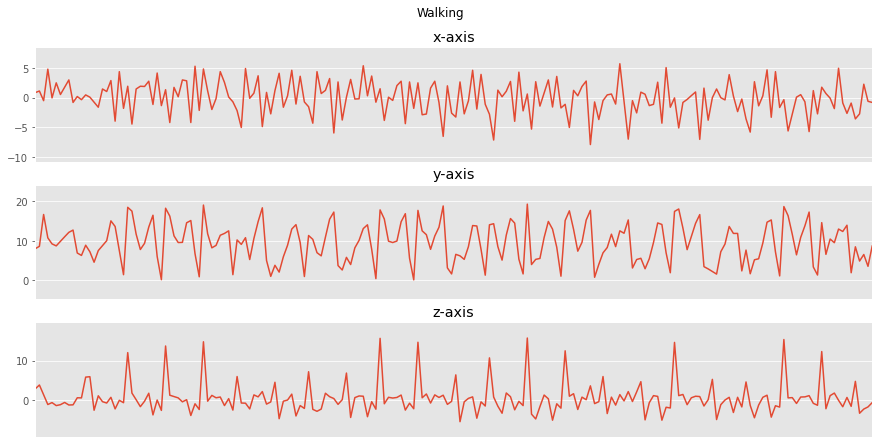

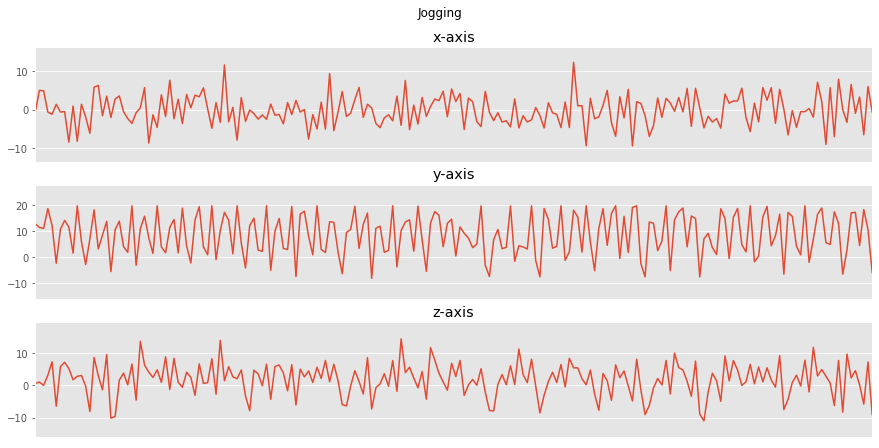

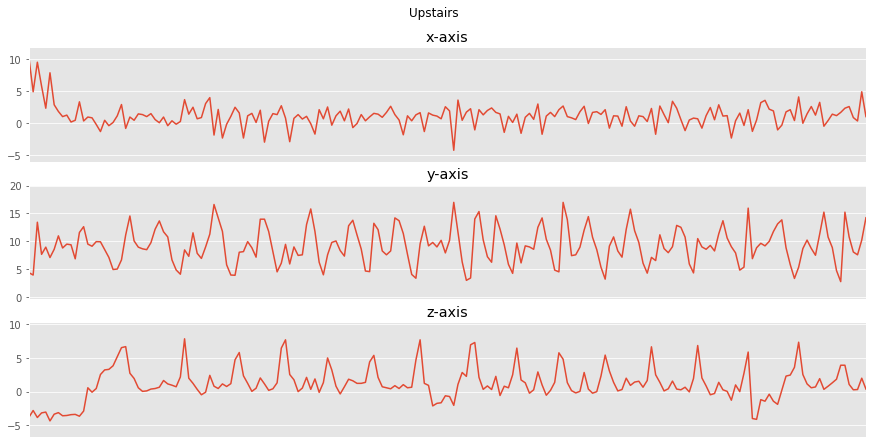

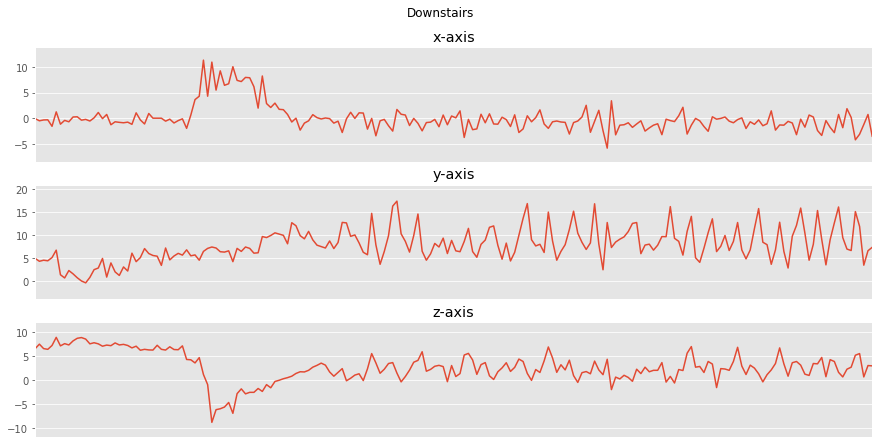

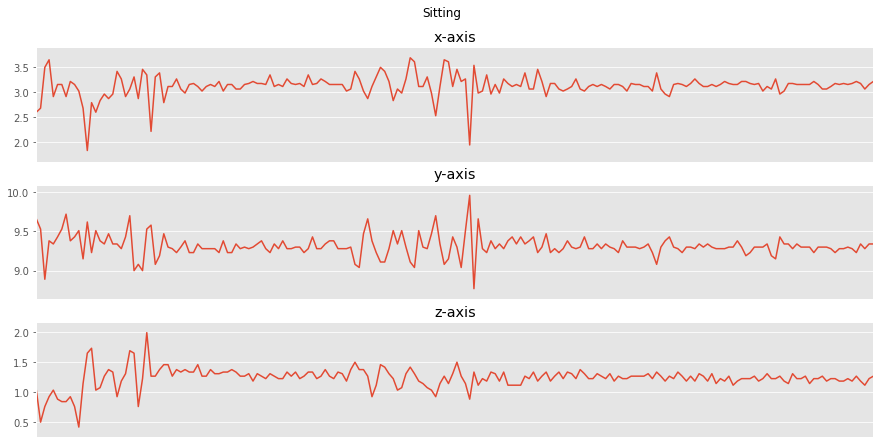

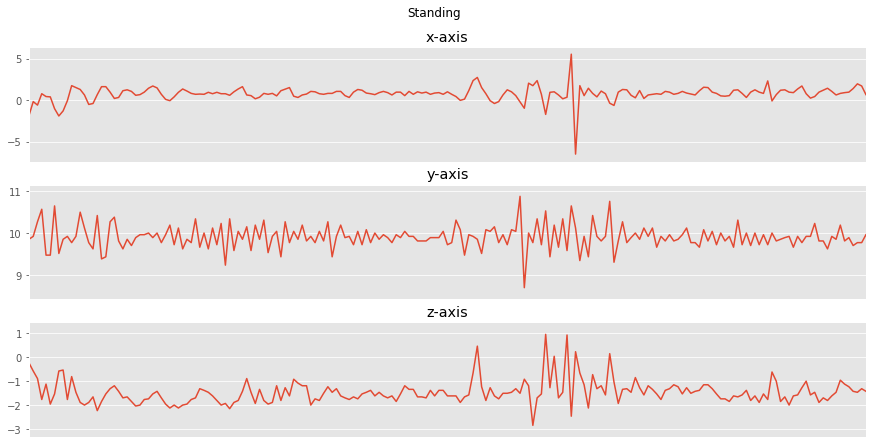

In [103]:
for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot) # some error, change it

In [26]:
df = data.drop(['user','time'],axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [27]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [32]:
Walking = df[df['activity'] == 'Walking'].head(3555).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3555).copy()
Standing = df[df['activity'] == 'Standing'].head(3555).copy()

In [35]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Jogging,Sitting,Standing,Upstairs,Downstairs])
balanced_data.shape

(21330, 4)

In [37]:
balanced_data['activity'].value_counts()
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [41]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### **Standardise Data**

In [106]:
X = balanced_data[['x','y','z']]
y = balanced_data['label']

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x','y','z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,0.482245,-0.354522,0.236730,0
21326,-0.368263,0.152722,-0.034494,0
21327,0.063698,0.234661,0.224586,0
21328,0.624443,0.168329,0.771083,0


# Frame Preparation

In [108]:
import scipy.stats as stats

In [109]:
Fs = 20 # per second frames passing by
frame_size = Fs * 4 # sample size is 80
hop_size = Fs*2 # advances by 40

In [110]:
def get_frames(df,frame_size,hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]

        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x,y,z]) # 3 * frame_size array
        labels.append(label) # single number
    #print(len(labels))
    frames = np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    labels = np.asarray(labels)

    # returned the 2D array of frames, where 
    return frames,labels

In [112]:
X,y = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape


((532, 80, 3), (532,))

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [115]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [116]:
X_train = X_train.reshape(425,80,3,1)
X_test = X_test.reshape(107,80,3,1)

In [117]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

# **2D CNN Model**

In [118]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(16,(2,2),activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2), activation = 'relu'))#no need to provide shape, as it auto matches
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

In [119]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [120]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/10
14/14 [==============================] - 0s 18ms/step - loss: 1.6262 - accuracy: 0.2424 - val_loss: 1.3634 - val_accuracy: 0.4486
Epoch 2/10
14/14 [==============================] - 0s 10ms/step - loss: 1.2962 - accuracy: 0.4494 - val_loss: 1.0651 - val_accuracy: 0.6542
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: 1.0352 - accuracy: 0.6188 - val_loss: 0.7718 - val_accuracy: 0.8037
Epoch 4/10
14/14 [==============================] - 0s 10ms/step - loss: 0.8012 - accuracy: 0.7576 - val_loss: 0.5319 - val_accuracy: 0.8505
Epoch 5/10
14/14 [==============================] - 0s 10ms/step - loss: 0.5677 - accuracy: 0.8494 - val_loss: 0.3778 - val_accuracy: 0.8598
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.5022 - accuracy: 0.8212 - val_loss: 0.3410 - val_accuracy: 0.8785
Epoch 7/10
14/14 [==============================] - 0s 9ms/step - loss: 0.4020 - accuracy: 0.8588 - val_loss: 0.2836 - val_accuracy: 0.8598
Epoch 8/10
14/